<a href="https://colab.research.google.com/github/KaziMuktadirAhmed/WISER-womenium-2025-project-1/blob/main/WISER-quantum-walk-monte-carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install qiskit qiskit-aer matplotlib pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 601.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e6cc8f40f1154a4339d54cda4c87a7da28880c45c0bc863b43d01ffb263fcee0
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [18]:
!pip install -q qiskit qiskit-aer matplotlib pylatexenc


--- Generating Circuit Diagram ---
Displaying circuit diagram in cell output:


┌───┐ ░    ┌───┐    ░       
q_0: ┤ H ├─░──■─┤ X ├─■──░───────
     └───┘ ░  │ └─┬─┘ │  ░ ┌─┐   
q_1: ──────░──X───┼───┼──░─┤M├───
     ┌───┐ ░  │   │   │  ░ └╥┘   
q_2: ┤ X ├─░──X───■───X──░──╫────
     └───┘ ░          │  ░  ║ ┌─┐
q_3: ──────░──────────X──░──╫─┤M├
           ░             ░  ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1


--- Simulation Results ---
{'10': 4056, '01': 4136}

--- Generating Histogram ---
Displaying histogram in cell output:


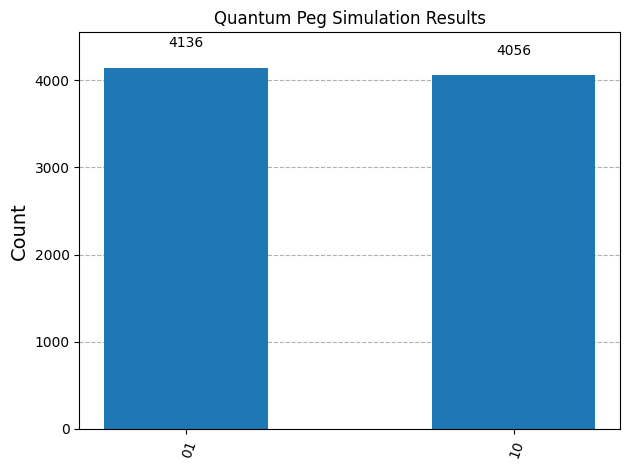

In [21]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    """
    Generates a Qiskit QuantumCircuit for a single 'quantum peg' as
    described in the "Universal Statistical Simulator" paper (Fig. 3).

    The circuit uses 4 qubits, mapped as follows from the paper:
    - q0: The control qubit that determines the path (left/right).
    - q1: The 'left' output channel.
    - q2: The input channel where the 'ball' starts.
    - q3: The 'right' output channel.

    Returns:
        QuantumCircuit: A Qiskit circuit object representing one quantum peg.
    """
    qc = QuantumCircuit(4, 2, name="Quantum Peg")
    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("text")

    if IS_IPYTHON:
        print("Displaying circuit diagram in cell output:")
        display(circuit_diagram)

    circuit_filename = "quantum_peg_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    # print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    simulator = AerSimulator()
    compiled_circuit = transpile(peg_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=8192)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    print("\n--- Simulation Results ---")
    print(counts)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(counts, title="Quantum Peg Simulation Results")

    if IS_IPYTHON:
        print("Displaying histogram in cell output:")
        display(histogram_figure) # This renders the plot in the notebook

    # histogram_filename = "quantum_peg_histogram.png"
    # histogram_figure.savefig(histogram_filename)
    # print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')


--- Generating Circuit Diagram ---


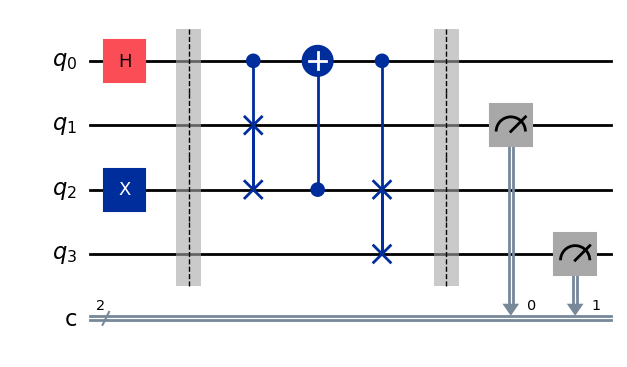

Circuit diagram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{'10': 0.4996337890625, '01': 0.5003662109375}

--- Generating Histogram ---


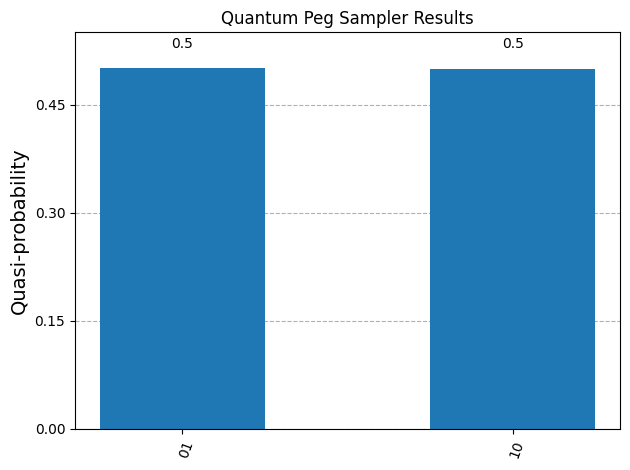

Histogram also saved to: H:\Developement\QGSS25\WISER\quantum_peg_histogram.png


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    qc = QuantumCircuit(4, 2, name="Quantum Peg")

    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(peg_circuit, shots=8192)
    result = job.result()

    quasi_dist = result.quasi_dists[0]
    probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Probabilities) ---")
    print(probabilities)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(probabilities, title="Quantum Peg Sampler Results")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')

# N-Layer QGB

### P-Gate: Hadamard
### Distribution: Gaussian

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 12

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='text', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=8192)
    result = job.result()

    # 4. Process the results from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    # Post-process the one-hot encoded results into a final distribution
    final_distribution = defaultdict(float)
    for bitstring, prob in raw_probabilities.items():
        # Qiskit bitstrings are little-endian (read right-to-left)
        # '00100' -> position 2
        try:
            position = bitstring.index('1')
            final_distribution[position] += prob
        except ValueError:
            # This handles the case of an all-zero bitstring, which can occur due to noise
            pass

    print("\n--- Sampler Results (Probabilities) ---")
    # Sort by position for cleaner printing
    print({k: v for k, v in sorted(final_distribution.items())})

    # 5. Plot the final processed distribution
    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(final_distribution, title=f"Final {N_LAYERS}-Layer QGB Distribution")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')


--- Generating Circuit Diagram for 12-Layer QGB ---


░      ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░      ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐    ░                                        
 q_0: ──────░──|0>─┤ H ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░──|0>─┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■─┤ X ├─■──░────────────────────────────────────────
            ░      └───┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │  ░      └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘

Circuit diagram also saved to: /content/12_layer_qgb_circuit.png

--- Running circuit with Sampler ---


# N-Layer QGB with reset optimization

### P-Gate: Hadamard
### Distribution: Gaussian

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int):
    """
    Generates an optimized Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    # Prepare control qubit for the first layer
    qc.h(control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # --- Peg Logic for the current layer ---
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # Rebalancing CNOT for pegs within the same layer
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        # --- OPTIMIZED Control Qubit Preparation for the *next* layer ---
        if layer < n_layers - 1:  # No need to prepare after the last layer
            if layer == 0:
                # After layer 0 (1 peg), control qubit is in state |1>.
                # Optimize by flipping to |0> then applying Hadamard.
                # This is more efficient than a full reset.
                qc.x(control_qubit)
                qc.h(control_qubit)
            else:
                # For subsequent layers, state is entangled. Reset is cleanest.
                qc.reset(control_qubit)
                qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 4

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=8192)
    result = job.result()

    # 4. Process the results from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    # Post-process the one-hot encoded results into a final distribution
    final_distribution = defaultdict(float)
    for bitstring, prob in raw_probabilities.items():
        # Qiskit bitstrings are little-endian (read right-to-left)
        try:
            position = bitstring.index('1')
            final_distribution[position] += prob
        except ValueError:
            # This handles the case of an all-zero bitstring, which can occur due to noise
            pass

    print("\n--- Sampler Results (Probabilities) ---")
    # Sort by position for cleaner printing
    print({k: v for k, v in sorted(final_distribution.items())})

    # 5. Plot the final processed distribution
    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(final_distribution, title=f"Final {N_LAYERS}-Layer QGB Distribution")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')